In [1]:
### DPS QKD Protocol, with 70% Depolarization Noise ###
### Implementation by Ajanta Das, 27-07-2023 ###

import qiskit
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,transpile,Aer,IBMQ
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from numpy.random import randint,random_integers
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
import numpy as np
import random
aer_sim = Aer.get_backend('qasm_simulator')




In [2]:
def get_noise(p_bit,p_phase,p_gate1,p_gate2):
    #bit_flip = pauli_error([('X',p_bit), ('I', 1 - p_bit)])#bit flip
    #phase_flip = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])#phase flip
    #bitphase_flip = phase_flip.compose(phase_flip)
    error_gate1 = depolarizing_error(p_gate1, 1)
    #error_gate2=amplitude_damping_error(p_gate, excited_state_population=0, canonical_kraus=True)
    #error_gate3=phase_damping_error(p_gate, canonical_kraus=True)
    #error_gate4=phase_amplitude_damping_error(p_gate1, p_gate2, excited_state_population=0, canonical_kraus=True)
    
    noise_model = NoiseModel()
    #noise_model.add_all_qubit_quantum_error(bitphase_flip, "measure") # measurement error is applied to measurements
    #noise_model.add_all_qubit_quantum_error(bit_flip, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x","h"]) # single qubit gate error is applied to x gates
        
    return noise_model

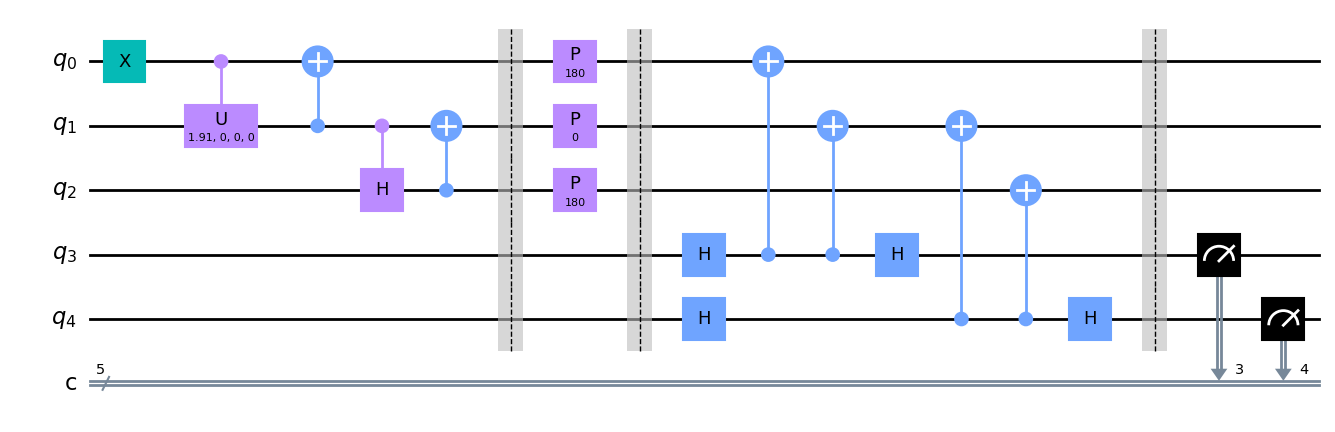

In [3]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.cu(1.91, 0, 0, 0, qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.ch(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.draw()

np.random.seed(seed=5)
n=3
phases=randint(2,size=n)
#print(phases)
phase_angle=[]
for i in range(n):
    if(phases[i]==0):
        phase_angle.append(0)
    else:
        phase_angle.append(180)
#print(phase_angle)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.p(phase_angle[0], qreg_q[0])
circuit.p(phase_angle[1], qreg_q[1])
circuit.p(phase_angle[2], qreg_q[2])
circuit.draw()

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[1])
circuit.cx(qreg_q[4], qreg_q[2])
circuit.h(qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.draw()


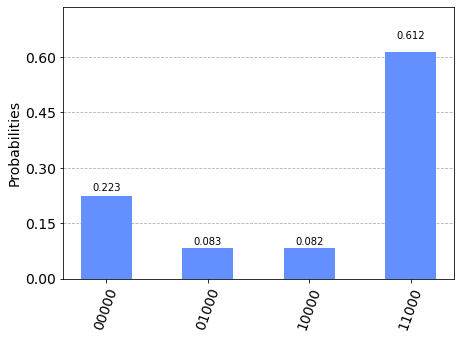

In [3]:
circ = transpile(circuit, aer_sim)
result = aer_sim.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)

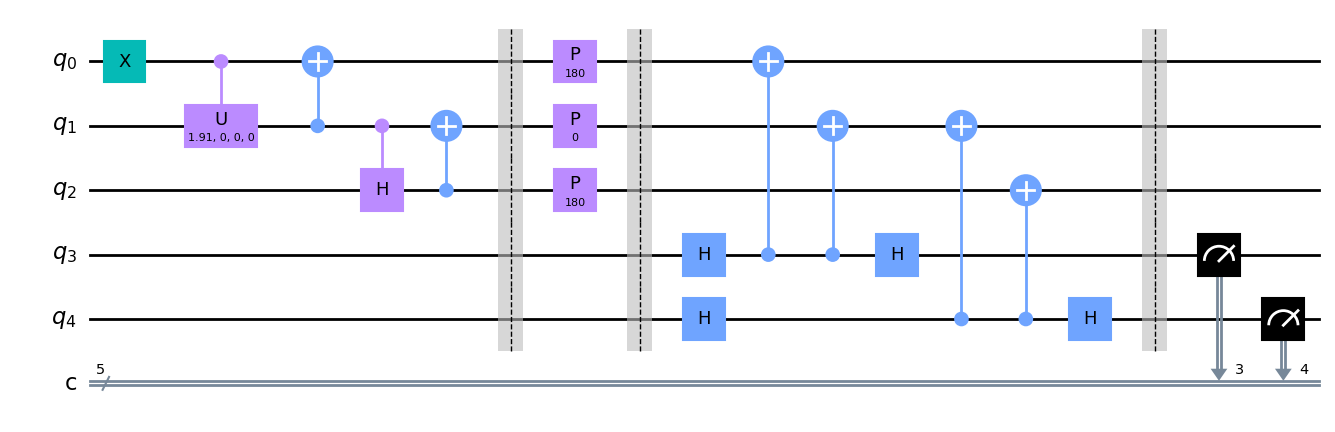

In [6]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

prob_1 = 0.7  # 1-qubit gate  #70% depolarization noise applied
error_1 = noise.depolarizing_error(prob_1, 1)

### Alice Setup
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit2 = QuantumCircuit(qreg_q, creg_c)

circuit2.x(qreg_q[0])
circuit2.cu(1.91, 0, 0, 0, qreg_q[0], qreg_q[1])
circuit2.cx(qreg_q[1], qreg_q[0])
circuit2.ch(qreg_q[1], qreg_q[2])
circuit2.cx(qreg_q[2], qreg_q[1])
circuit2.draw()

np.random.seed(seed=5)
n=3
phases=randint(2,size=n)
#print(phases)
phase_angle=[]
for i in range(n):
    if(phases[i]==0):
        phase_angle.append(0)
    else:
        phase_angle.append(180)
#print(phase_angle)
circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit2.p(phase_angle[0], qreg_q[0])
circuit2.p(phase_angle[1], qreg_q[1])
circuit2.p(phase_angle[2], qreg_q[2])
circuit2.draw()

circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit2.h(qreg_q[3])
circuit2.h(qreg_q[4])
circuit2.cx(qreg_q[3], qreg_q[0])
circuit2.cx(qreg_q[3], qreg_q[1])
circuit2.h(qreg_q[3])
circuit2.cx(qreg_q[4], qreg_q[1])
circuit2.cx(qreg_q[4], qreg_q[2])
circuit2.h(qreg_q[4])
circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

#noise_model = get_noise(0.25, 0.25, 0.7, 0.25)  
# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
#noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

circuit2.measure(qreg_q[3], creg_c[3])
circuit2.measure(qreg_q[4], creg_c[4])
circuit2.draw()




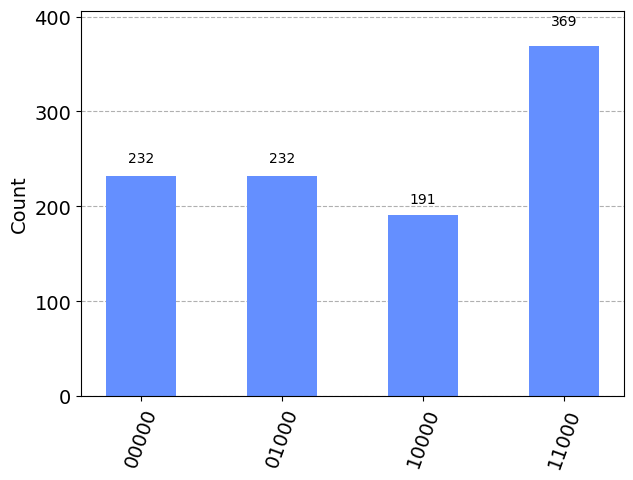

In [7]:
circ = transpile(circuit2, aer_sim)
result = aer_sim.run(circ,noise_model=noise_model).result()
counts = result.get_counts(circ)
plot_histogram(counts)